In [2]:
import pickle
import shutil
import pandas as pd
from src import utils
from src import constant
from src.job import Cifar10Job
from src.constant import ROBUSTBENCH_CIFAR10_MODEL_NAMES, TRANSFORMATIONS, GAUSSIAN_NOISE

In [4]:
jobs_queue_path = constant.ROOT / 'jobs'
finished_job_path = constant.ROOT / 'finished_jobs'

In [ ]:
utils.clean_dir(jobs_queue_path)
utils.clean_dir(finished_job_path)

In [3]:
source = constant.ROOT / 'data' / 'cifar10_pytorch' / 'val'
destination = constant.ROOT / 'bootstrap_data' / 'cifar10_pytorch'

In [4]:
counter = 0
for model_name in ROBUSTBENCH_CIFAR10_MODEL_NAMES[:3]:
    job = Cifar10Job(source, destination, num_sample_iter=2, sample_size=10, transformation=GAUSSIAN_NOISE,
                 model_name=model_name, rq_type='abs')
    f = open(jobs_queue_path / f'{counter}.pickle', 'wb')
    counter += 1
    pickle.dump(job, f)
    f.close()

07-27-2021 09:35:04 | INFO | bootstrap.py | 56 | bootstrapping


100%|██████████| 2/2 [00:01<00:00,  1.44it/s]


07-27-2021 09:35:06 | INFO | evaluate.py | 37 | Device: cpu


100%|██████████| 20/20 [00:04<00:00,  4.89it/s, Iteration=1]

--------------------------------------------
Verifying Absolute Requirement: 
Estimated mean from bootstrapping: 0.95
Estimated sigma from bootstrapping: 0.04999999999999999
confidence of satisfication:0.15865525393145674
requirement NOT SATISFIED
--------------------------------------------


07-27-2021 09:35:13 | INFO | bootstrap.py | 56 | bootstrapping


100%|██████████| 2/2 [00:01<00:00,  1.39it/s]


07-27-2021 09:35:15 | INFO | evaluate.py | 37 | Device: cpu


100%|██████████| 20/20 [00:02<00:00,  6.94it/s, Iteration=1]

--------------------------------------------
Verifying Absolute Requirement: 
Estimated mean from bootstrapping: 0.95
Estimated sigma from bootstrapping: 0.04999999999999999
confidence of satisfication:0.15865525393145674
requirement NOT SATISFIED
--------------------------------------------
07-27-2021 09:35:21 | INFO | bootstrap.py | 56 | bootstrapping


100%|██████████| 20/20 [00:07<00:00,  2.71it/s, Iteration=1]


07-27-2021 09:35:23 | INFO | evaluate.py | 37 | Device: cpu


100%|██████████| 20/20 [00:02<00:00,  7.46it/s, Iteration=1]

--------------------------------------------
Verifying Absolute Requirement: 
Estimated mean from bootstrapping: 1.0
Estimated sigma from bootstrapping: 0.0
confidence of satisfication:nan
requirement NOT SATISFIED
--------------------------------------------


/home/huakun/anaconda3/envs/AI/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1835: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/huakun/anaconda3/envs/AI/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1835: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/huakun/anaconda3/envs/AI/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1919: RuntimeWarning: invalid value encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)


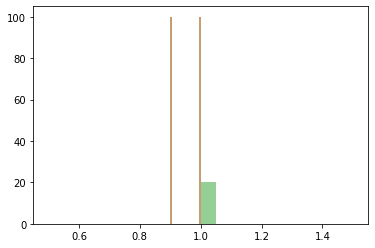

100%|██████████| 20/20 [00:03<00:00,  6.62it/s, Iteration=1]


In [5]:
for job_file in jobs_queue_path.iterdir():
    f = open(job_file, 'rb')
    job = pickle.load(f)
    try:
        job.run()
        f = open(job_file, 'wb')
        pickle.dump(job, f)
        shutil.move(job_file, finished_job_path/job_file.name)
        # print(job)
    except Exception as e:
        print("error")
        print(e)

In [5]:
finished_jobs = []
for job_file in finished_job_path.iterdir():
    f = open(job_file, 'rb')
    job = pickle.load(f)
    finished_jobs.append(job.to_dict())
    print(job)


        source: /home/huakun/Documents/summer-research/automating_requirements/verifying2/data/cifar10_pytorch/val
        destination: /home/huakun/Documents/summer-research/automating_requirements/verifying2/bootstrap_data/cifar10_pytorch
        num_sample_iter: 2
        sample_size: 10
        done: True
        success: False
        model_name: Chen2020Adversarial
        rq_type: abs
        transformation: gaussian_noise
        conf: 0.15865525393145674
        mu: 0.95
        sigma: 0.04999999999999999
        satisfied: False
        

        source: /home/huakun/Documents/summer-research/automating_requirements/verifying2/data/cifar10_pytorch/val
        destination: /home/huakun/Documents/summer-research/automating_requirements/verifying2/bootstrap_data/cifar10_pytorch
        num_sample_iter: 2
        sample_size: 10
        done: True
        success: False
        model_name: Chen2020Efficient
        rq_type: abs
        transformation: gaussian_noise
        conf

In [6]:
pd.DataFrame(data=finished_jobs)

,source,destination,num_sample_iter,sample_size,done,success,model_name,rq_type,transformation,conf,mu,sigma,satisfied
0,/home/huakun/Documents/summer-research/automat...,/home/huakun/Documents/summer-research/automat...,2,10,True,False,Chen2020Adversarial,abs,gaussian_noise,0.158655,0.95,0.05,False
1,/home/huakun/Documents/summer-research/automat...,/home/huakun/Documents/summer-research/automat...,2,10,True,False,Chen2020Efficient,abs,gaussian_noise,0.158655,0.95,0.05,False
2,/home/huakun/Documents/summer-research/automat...,/home/huakun/Documents/summer-research/automat...,2,10,True,False,Carmon2019Unlabeled,abs,gaussian_noise,NaN,1.00,0.00,False
